#Intitial segmentation tasks is done in this file
Segments Given image into different categories like
- Text
- Table
- Bar Graph
- Pie Chart

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Only Run below cell if u need to install in collab enviornments if this is running locally than no need to run cell below


In [2]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core

!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15837, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 15837 (delta 30), reused 12 (delta 12), pack-reused 15781 (from 2)
Receiving objects: 100% (15837/15837), 6.40 MiB | 10.78 MiB/s, done.
Resolving deltas: 100% (11537/11537), done.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.9 MB/s eta 0:00:00
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61396 sha256=d7e3d271d7d593ee0b01029636465f2b0aeaee01df5bd4fc3622fc673928df78
  Stored in directory: /root/.cache/pip/wheels/65/71/95/3b8fde5c65c6e4a806e0867c1651dcc71a1cb2f3430e8f355f
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-

#Import different libraries and frameworks

if you are running locally
change <br>
from google.colab.patches import cv2_imshow
instead use cv2.imshow from cv2 libarary


In [3]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
torch:  2.5 ; cuda:  cu124
detectron2: 0.6


In [4]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

#Optional cell
Use to assign datasets no need to use to only check the model

In [5]:
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

# Only remove if it exists
if "my_dataset_train" in DatasetCatalog:
  MetadataCatalog.remove("my_dataset_train")
  DatasetCatalog.remove("my_dataset_train")
if "my_dataset_val" in DatasetCatalog:
  MetadataCatalog.remove("my_dataset_val")
  DatasetCatalog.remove("my_dataset_val")
train_dataset_json = "/content/drive/MyDrive/Minor project /50_500all/train/50_500_train.json" #provide filepath of json file of training dataset
train_dataset_folder = "/content/drive/MyDrive/Minor project /50_500all/train" #provide filepath of folder containing training datase
val_dataset_json = "/content/drive/MyDrive/Minor project /50_500all/val/50_500_val.json" #provide filepath of json file of validation dataset
val_dataset_folder = "/content/drive/MyDrive/Minor project /50_500all/val" #provide filepath of folder containing validation dataset
# Now register again
register_coco_instances("my_dataset_train", {}, train_dataset_json, train_dataset_folder)
register_coco_instances("my_dataset_val", {}, val_dataset_json, val_dataset_folder)

In [6]:
train_metadata = MetadataCatalog.get("my_dataset_train")
train_dataset_dicts = DatasetCatalog.get("my_dataset_train")

[02/28 16:43:34 d2.data.datasets.coco]: Loading /content/drive/MyDrive/Minor project /50_500all/train/50_500_train.json takes 3.03 seconds.
[02/28 16:43:34 d2.data.datasets.coco]: Loaded 550 images in COCO format from /content/drive/MyDrive/Minor project /50_500all/train/50_500_train.json


In [7]:
val_metadata = MetadataCatalog.get("my_dataset_val")
val_dataset_dicts = DatasetCatalog.get("my_dataset_val")

[02/28 16:43:34 d2.data.datasets.coco]: Loaded 210 images in COCO format from /content/drive/MyDrive/Minor project /50_500all/val/50_500_val.json


#Load the finetuned model
Below cell loads the model we trained which can be used on test images for classification to different categories


In [8]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
import os
import torch

   # Load base configuration
cfg = get_cfg()


config_yaml_path = "/content/drive/MyDrive/Minor project /50_500all/lasttry/config.yaml" #provide the path of config.yaml file
cfg.merge_from_file(config_yaml_path)


cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/Minor project /50_500all/lasttry/model_final.pth" #provide the path of model_final.pth file


cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # Adjust threshold as needed


if not torch.cuda.is_available():
    print("Warning: CUDA not available, using CPU instead.")
    cfg.MODEL.DEVICE = "cpu" #Force the model to use CPU


predictor = DefaultPredictor(cfg)

[02/28 16:43:39 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/Minor project /50_500all/lasttry/model_final.pth ...


/usr/local/lib/python3.11/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

<h1>Visualize the result of text image</h1>
- change the cv2_imshow to cv2.imshom if used locally

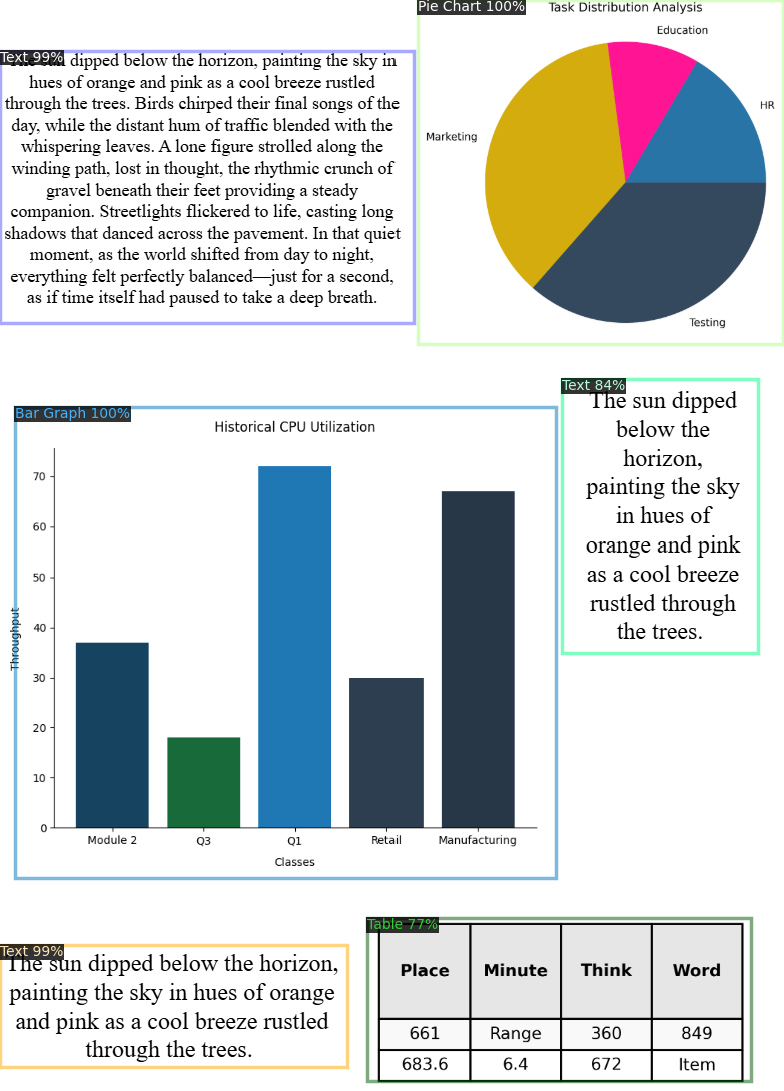

In [12]:
img_path = "/content/lastcheck.png"
new_im = cv2.imread(img_path)
outputs  = predictor(new_im)

# We can use `Visualizer` to draw the predictions on the image.
pred_boxes = outputs["instances"].pred_boxes
scores = outputs["instances"].scores
pred_classes = outputs["instances"].pred_classes
v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

cv2_imshow(out.get_image()[:, :, ::-1])

In [10]:
new_im = cv2.imread("/content/Data.png") #Your image file here
outputs  = predictor(new_im)

# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

cv2_imshow(out.get_image()[:, :, ::-1])

AttributeError: 'NoneType' object has no attribute 'shape'

#Output to json
- map the output to json file containing boundries class
- Save the different categories into different folders


In [ ]:
instances = outputs["instances"]
pred_boxes = instances.pred_boxes.tensor.tolist()
pred_classes = instances.pred_classes.tolist()
scores = instances.scores.tolist()

# Format the output
predictions = []
for box, cls, score in zip(pred_boxes, pred_classes, scores):
    predictions.append({
        "class": cls,
        "bbox": box,
        "score": score
    })

# Save as JSON
json_file_path = "/content/drive/MyDrive/Minor project /check/inference_check_Data/inititalsegmentation.json" #provide a path for json file  e.g myresult/output.json
with open(json_file_path, "w") as f:
    json.dump(predictions, f, indent=4)

[{"id":1,"name":"Text"},<br>
{"id":2,"name":"Table"},<br>
{"id":3,"name":"Bar Graph"},<br>
{"id":4,"name":"Pie Chart"},<br>

subtract by 1 we get class

In [ ]:

class_mapping = [
    {"id": 0, "name": "Text"},
    {"id": 1, "name": "Table"},
    {"id": 2, "name": "Bar Graph"},
    {"id": 3, "name": "Pie Chart"},
]


class_dict = {item["id"]: item["name"] for item in class_mapping}


image_path = "/content/inference check.png"
image = cv2.imread(image_path)

# Load predictions from JSON file
json_path = "/content/drive/MyDrive/Minor project /check/inference_check_Data/inititalsegmentation.json"
with open(json_path, "r") as f:
    predictions = json.load(f)


base_output_dir = "/content/drive/MyDrive/Minor project /check/inference_check_Data"
os.makedirs(base_output_dir, exist_ok=True)


unknown_dir = os.path.join(base_output_dir, "Unknown")
os.makedirs(unknown_dir, exist_ok=True)


for idx, detection in enumerate(predictions):
    class_id = detection["class"]
    bbox = detection["bbox"]
    score = detection["score"]


    class_name = class_dict.get(class_id, f"Unknown_{class_id}")

    # Create class-specific folder
    class_dir = os.path.join(base_output_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)


    x1, y1, x2, y2 = map(int, bbox)

    # Crop the detected object from the image
    object_crop = image[y1:y2, x1:x2]


    filename = f"{class_name}_score_{score:.2f}_object_{idx}.png"
    output_path = os.path.join(class_dir, filename)
    cv2.imwrite(output_path, object_crop)

print(f"Detected objects have been organized into folders inside '{base_output_dir}'.")

Detected objects have been organized into folders inside '/content/drive/MyDrive/Minor project /check/inference_check_Data'.
